# Random Forest Classification for Twitter Bot Account Detection

## Import libraries

In [322]:
import pandas as pd # to manipulate and use our data from dataset.csv
import shap # explains the importance of features in our model
from sklearn.model_selection import train_test_split # splits our data into model testing and model training 
from sklearn.ensemble import RandomForestClassifier # implements the Random Forest Classifier algorithm for model training
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # metrics to assess performance of our model

## Load Our Dataset

In [323]:
df = pd.read_csv('dataset.csv')
df.head()

,user_id,screen_name,is_bot,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,1217628182611927040,boazbaraktcs,0,1778,1,0,0.000,459,18538,0.025,...,0.000,0.865,1.404,0.250,0.000,0.0,0.215,0.083,1.880,0.121
1,36741729,Matthew_Brody,1,5690,0,0,0.000,615,456,1.349,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
2,1679822588,GrianMC,1,4119,0,0,NaN,274,282752,0.001,...,0.009,0.162,0.126,0.189,0.027,0.0,0.306,0.152,3.484,0.111
3,1519144464,NikhilSewdass,0,4183,0,0,0.933,409,191,2.141,...,0.000,0.500,30.250,0.000,0.500,0.0,-0.403,1.309,3.927,1.309
4,15211869,jamie_love,0,6001,1,0,0.000,2616,11106,0.236,...,0.000,0.151,0.453,0.442,0.000,0.0,-0.136,0.089,0.353,0.177


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         3000 non-null   int64  
 1   screen_name                     3000 non-null   object 
 2   is_bot                          3000 non-null   int64  
 3   account_age                     3000 non-null   int64  
 4   is_blue_verified                3000 non-null   int64  
 5   is_verified                     3000 non-null   int64  
 6   profile_description_sentiment   2451 non-null   float64
 7   following_count                 3000 non-null   int64  
 8   followers_count                 3000 non-null   int64  
 9   following_to_followers          3000 non-null   float64
 10  is_possibly_sensitive           3000 non-null   int64  
 11  is_default_profile_image        3000 non-null   int64  
 12  is_profile_banner               30

## Feature Engineering

### Replace null values with a zero

In [325]:
df.isnull().sum()

user_id                             0
screen_name                         0
is_bot                              0
account_age                         0
is_blue_verified                    0
is_verified                         0
profile_description_sentiment     549
following_count                     0
followers_count                     0
following_to_followers              0
is_possibly_sensitive               0
is_default_profile_image            0
is_profile_banner                   0
is_profile_image_valid              0
tweet_freq                          0
parsed_owned_tweets_count           0
parsed_owned_text_tweets_count      0
parsed_retweets_count               0
likes_freq                          0
media_freq                          0
followers_freq                      0
following_freq                      0
replies_to_owned                    0
quotes_to_owned                     0
retweets_to_owned                   0
avg_urls                            0
avg_hashtags

In [326]:
df.fillna(0, inplace=True)

In [327]:
df.isnull().sum()

user_id                           0
screen_name                       0
is_bot                            0
account_age                       0
is_blue_verified                  0
is_verified                       0
profile_description_sentiment     0
following_count                   0
followers_count                   0
following_to_followers            0
is_possibly_sensitive             0
is_default_profile_image          0
is_profile_banner                 0
is_profile_image_valid            0
tweet_freq                        0
parsed_owned_tweets_count         0
parsed_owned_text_tweets_count    0
parsed_retweets_count             0
likes_freq                        0
media_freq                        0
followers_freq                    0
following_freq                    0
replies_to_owned                  0
quotes_to_owned                   0
retweets_to_owned                 0
avg_urls                          0
avg_hashtags                      0
identical_tweet_freq        

In [328]:
df.head()

,user_id,screen_name,is_bot,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,1217628182611927040,boazbaraktcs,0,1778,1,0,0.000,459,18538,0.025,...,0.000,0.865,1.404,0.250,0.000,0.0,0.215,0.083,1.880,0.121
1,36741729,Matthew_Brody,1,5690,0,0,0.000,615,456,1.349,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
2,1679822588,GrianMC,1,4119,0,0,0.000,274,282752,0.001,...,0.009,0.162,0.126,0.189,0.027,0.0,0.306,0.152,3.484,0.111
3,1519144464,NikhilSewdass,0,4183,0,0,0.933,409,191,2.141,...,0.000,0.500,30.250,0.000,0.500,0.0,-0.403,1.309,3.927,1.309
4,15211869,jamie_love,0,6001,1,0,0.000,2616,11106,0.236,...,0.000,0.151,0.453,0.442,0.000,0.0,-0.136,0.089,0.353,0.177


### Drop irrelevent values to training

We want to drop user_id and screen_name as those are irrelevant to bot status. All the parsed_ features are used for calculations of other features. From earlier analysis, we learned that is_verfied is not relevant so we will remove that feature as well.

In [329]:
df.drop(columns=['user_id', 'screen_name', 'parsed_owned_tweets_count', 'parsed_owned_text_tweets_count', 'parsed_retweets_count', 'is_verified'], inplace=True)

In [330]:
df.head()

,is_bot,account_age,is_blue_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,is_possibly_sensitive,is_default_profile_image,is_profile_banner,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,0,1778,1,0.000,459,18538,0.025,0,0,1,...,0.000,0.865,1.404,0.250,0.000,0.0,0.215,0.083,1.880,0.121
1,1,5690,0,0.000,615,456,1.349,0,0,1,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
2,1,4119,0,0.000,274,282752,0.001,0,0,1,...,0.009,0.162,0.126,0.189,0.027,0.0,0.306,0.152,3.484,0.111
3,0,4183,0,0.933,409,191,2.141,0,0,1,...,0.000,0.500,30.250,0.000,0.500,0.0,-0.403,1.309,3.927,1.309
4,0,6001,1,0.000,2616,11106,0.236,0,0,1,...,0.000,0.151,0.453,0.442,0.000,0.0,-0.136,0.089,0.353,0.177


## Isolate and Drop Target Variable

The target variable is what we are trying to predict. In this case is_bot. We want to drop it to ensure the model is trained on input variables and not outcomes.

In [331]:
Y = df.is_bot
Y.head()

0    0
1    1
2    1
3    0
4    0
Name: is_bot, dtype: int64

In [332]:
df.drop('is_bot', inplace=True, axis=1)

In [333]:
df.head()

,account_age,is_blue_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,is_possibly_sensitive,is_default_profile_image,is_profile_banner,is_profile_image_valid,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,1778,1,0.000,459,18538,0.025,0,0,1,0,...,0.000,0.865,1.404,0.250,0.000,0.0,0.215,0.083,1.880,0.121
1,5690,0,0.000,615,456,1.349,0,0,1,0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
2,4119,0,0.000,274,282752,0.001,0,0,1,0,...,0.009,0.162,0.126,0.189,0.027,0.0,0.306,0.152,3.484,0.111
3,4183,0,0.933,409,191,2.141,0,0,1,0,...,0.000,0.500,30.250,0.000,0.500,0.0,-0.403,1.309,3.927,1.309
4,6001,1,0.000,2616,11106,0.236,0,0,1,0,...,0.000,0.151,0.453,0.442,0.000,0.0,-0.136,0.089,0.353,0.177


Now we are just saving the new df without is_bot to X

In [334]:
X = df

In [335]:
X

,account_age,is_blue_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,is_possibly_sensitive,is_default_profile_image,is_profile_banner,is_profile_image_valid,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,1778,1,0.000,459,18538,0.025,0,0,1,0,...,0.000,0.865,1.404,0.250,0.000,0.000,0.215,0.083,1.880,0.121
1,5690,0,0.000,615,456,1.349,0,0,1,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,4119,0,0.000,274,282752,0.001,0,0,1,0,...,0.009,0.162,0.126,0.189,0.027,0.000,0.306,0.152,3.484,0.111
3,4183,0,0.933,409,191,2.141,0,0,1,0,...,0.000,0.500,30.250,0.000,0.500,0.000,-0.403,1.309,3.927,1.309
4,6001,1,0.000,2616,11106,0.236,0,0,1,0,...,0.000,0.151,0.453,0.442,0.000,0.000,-0.136,0.089,0.353,0.177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1634,1,0.000,7859,11064,0.710,0,0,1,0,...,0.045,0.180,0.404,0.000,0.011,0.000,-0.074,1.345,38.431,1.362
2996,2850,0,0.538,1338,5989,0.223,0,0,1,0,...,0.022,0.489,0.359,0.228,0.000,0.001,0.687,0.370,10.741,1.829
2997,3493,0,0.731,163,621,0.262,0,0,1,0,...,0.000,0.083,0.488,0.381,0.071,0.000,0.358,1.131,18.461,4.294
2998,2249,0,0.000,906,1787,0.507,0,0,1,0,...,0.065,0.243,0.168,0.159,0.056,0.000,0.500,0.570,5.973,0.926


## Split Data into Test and Training Sets

In [336]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=82)

This sets of data are randomly selected. 80% will go into training and 20% will go into testing. Random state is used to produce the same random outcome.

In [337]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('Y_train: ', Y_train.shape)
print('Y_test: ', Y_test.shape)

X_train:  (2400, 25)
X_test:  (600, 25)
Y_train:  (2400,)
Y_test:  (600,)


## Training Random Forest Classification on Training Set

In [338]:
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=0)
model.fit(X_train.values, Y_train.values)

RandomForestClassifier(criterion='entropy', random_state=0)

criterion: How the decision trees are splitting nodes. either 'gini' or 'entropy'.  
n_estimators: The number of decision trees in the forest. we want ~100.  
max_samples: How many rows are being considered in each decision tree. We want all of them, leave empty.  

## Predicting Test Results

In [339]:
y_pred = model.predict(X_test.values)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,

## Confusion Matrix

In [340]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[222  88]
 [ 57 233]]


confusion matrix tells us the results of the testing  

[0][0]: True Negative - Correctly predicted human account  
[0][1]: False Negative - Incorrectly predicted human account   
[1][0]: False Positive - Incorrectly predicted bot account  
[1][1]: True Positive - Correctly predicted bot account  

In [354]:
round(accuracy_score(Y_test, y_pred), 2)

0.76

In [342]:
report = classification_report(Y_test, y_pred, output_dict=True)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.75       310
           1       0.73      0.80      0.76       290

    accuracy                           0.76       600
   macro avg       0.76      0.76      0.76       600
weighted avg       0.76      0.76      0.76       600



In [343]:
print(f"""
Key Results:

Precision:
- {report["0"]["precision"] * 100:.2f}% of the predictions that were humans were actually humans.
- {report["1"]["precision"] * 100:.2f}% of the predictions that were bots were actually bots.

Recall:
- The model correctly identified {report["0"]["recall"] * 100:.2f}% of humans.
- The model correctly identified {report["1"]["recall"] * 100:.2f}% of bots.

F1 Score:
- Humans: {report["0"]["f1-score"]:.2f}
- Bots: {report["1"]["f1-score"]:.2f}

Support:
- Humans: {report["0"]["support"]} instances in the test set.
- Bots: {report["1"]["support"]} instances in the test set.
""")


Key Results:

Precision:
- 79.57% of the predictions that were humans were actually humans.
- 72.59% of the predictions that were bots were actually bots.

Recall:
- The model correctly identified 71.61% of humans.
- The model correctly identified 80.34% of bots.

F1 Score:
- Humans: 0.75
- Bots: 0.76

Support:
- Humans: 310.0 instances in the test set.
- Bots: 290.0 instances in the test set.



## Use SHAP to Interpret Feature Importance

In [344]:
explainer = shap.TreeExplainer(model)

In [345]:
shap_values = explainer.shap_values(X_test)

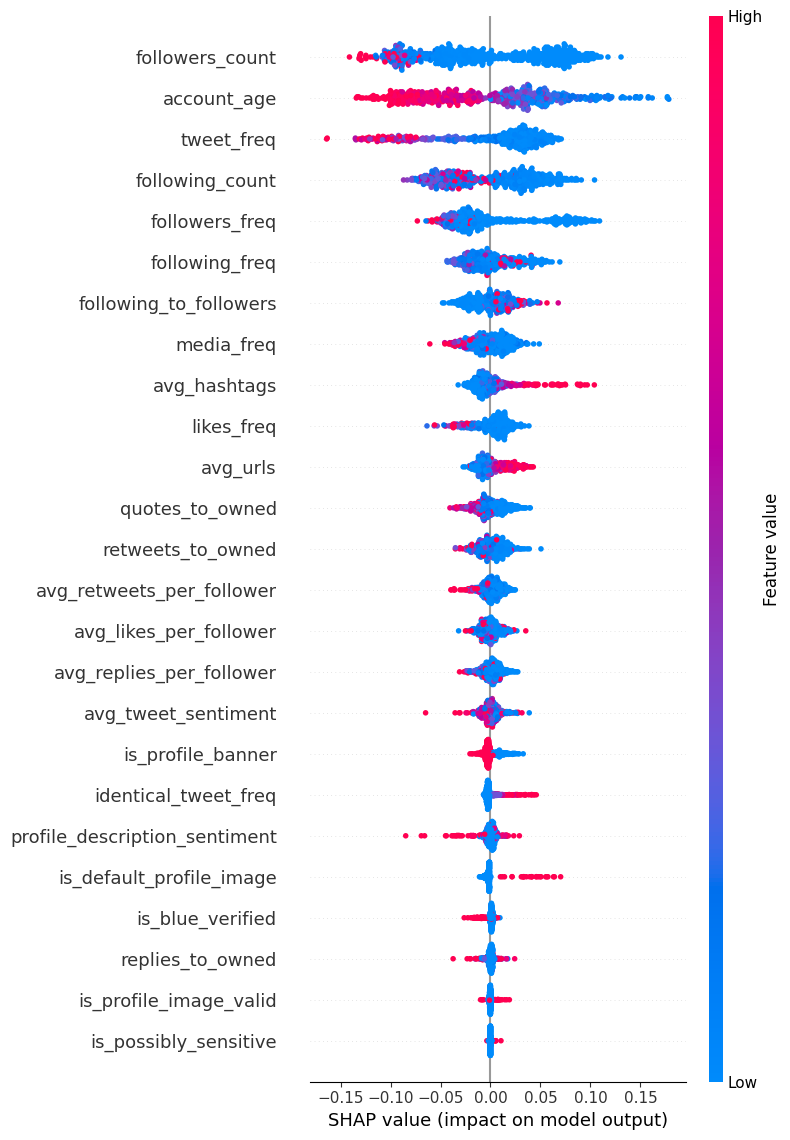

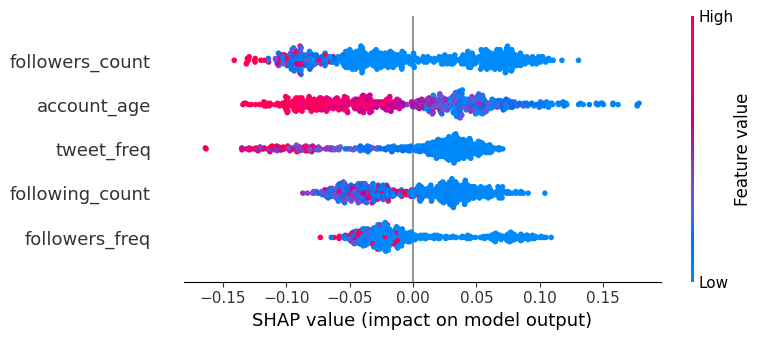

In [346]:
shap.summary_plot(shap_values[:,:,1], X_test, max_display=X_test.shape[1])
shap.summary_plot(shap_values[:,:,1], X_test, max_display=5)

This summary plot tells us a few things:  

- Features higher on the list (e.g. followers_count, tweet_freq) are the more important features for the model's prediction.
- The SHAP value of an indivdual point tells us in which direction is the value pointing the model towards (positive values towards a bot, negative values towards a human).
- The color of an individual point tells us the actual value of the point. For example, account_age has a few blue points shifted right meaning that users with a low account age are pushing the model to predict it as a bot.

## Save Model

In [347]:
import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']

## Load Model and Test User

In [348]:
loaded_model = joblib.load('model.joblib')
user = X_test.iloc[0]
user

account_age                      5998.000
is_blue_verified                    0.000
profile_description_sentiment       0.000
following_count                     0.000
followers_count                   508.000
following_to_followers              0.000
is_possibly_sensitive               0.000
is_default_profile_image            0.000
is_profile_banner                   1.000
is_profile_image_valid              0.000
tweet_freq                          0.057
likes_freq                          0.008
media_freq                          0.023
followers_freq                      0.085
following_freq                      0.000
replies_to_owned                    0.000
quotes_to_owned                     0.000
retweets_to_owned                   0.059
avg_urls                            0.958
avg_hashtags                        6.644
identical_tweet_freq                0.000
avg_tweet_sentiment                 0.259
avg_replies_per_follower            0.050
avg_likes_per_follower            

## Make Predicition

In [349]:
prediction = loaded_model.predict([user])
probabilities = loaded_model.predict_proba([user])

In [350]:
print(f'Prediction: {prediction}')
print(f'Probabilities: {probabilities}')

Prediction: [1]
Probabilities: [[0.34 0.66]]


This tells us that the model predicted is_bot = 1, with a 66% probability.

## Obtain Information About Result

In [351]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(user)

In [352]:
feature_names = X_test.columns.tolist() 
feature_contributions = list(zip(feature_names, shap_values[:, 0 if prediction[0] == 0 else 1]))
feature_contributions.sort(key=lambda x: abs(x[1]), reverse=True)
print(f"Feature Contributions: ")
for feature, contribution in feature_contributions:
    print(f"{feature}: {contribution}")

Feature Contributions: 
avg_hashtags: 0.09424874589049731
account_age: -0.0875741568889819
following_count: 0.05939222625482124
tweet_freq: 0.04747553909339992
following_freq: 0.03193210945983053
followers_count: -0.027871583577116336
avg_urls: 0.026920504122636284
quotes_to_owned: 0.025323572263325142
followers_freq: -0.015895838054290217
following_to_followers: -0.011067198104571921
avg_replies_per_follower: 0.009660928644514993
likes_freq: 0.009368962357383815
media_freq: -0.007259666418235787
is_blue_verified: 0.006523698150597641
retweets_to_owned: 0.0036338037198853585
is_profile_banner: -0.002925867363307706
identical_tweet_freq: -0.002884593321410183
avg_likes_per_follower: 0.0013440993260809067
is_default_profile_image: -0.0011635499893401396
profile_description_sentiment: -0.0010712346102491196
avg_retweets_per_follower: -0.0010090245566426934
replies_to_owned: 0.0008435237235674131
is_profile_image_valid: -0.0005819198275852835
avg_tweet_sentiment: -0.0003851544257857567
is_

This tells us the user features (in order of importance) that contributed most heavily towards being the result. Positive equals pushes the model toward the result class, negative pushes the model away from the result class.

We just want to get the top three features to display on our app.

## Get Top Three User Features

In [353]:
top_features = {feature: user[feature] for feature, _ in feature_contributions[:3]}
top_features

{'avg_hashtags': np.float64(6.644),
 'account_age': np.float64(5998.0),
 'following_count': np.float64(0.0)}

## Return All Data Needed

In [651]:
stats = {'prediction': 'human' if prediction[0] == 0 else 'bot', 'probability': float(probabilities[0][0]) if prediction[0] == 0 else float(probabilities[0][1]), 'top_features': top_features}
stats

{'prediction': 'bot',
 'probability': 0.53,
 'top_features': {'followers_count': np.float64(482.0),
  'account_age': np.float64(4672.0),
  'followers_freq': np.float64(0.103)}}